#**Customer Segmentation  Analysis**

Data Collection

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ifood = pd.read_csv('/content/ifood_df.csv')

Data Exploration and Cleaning

In [3]:
print(ifood.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [4]:
print(ifood.describe)

<bound method NDFrame.describe of        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1              

In [5]:
print(ifood.dtypes)

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [6]:
print(ifood.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

In [7]:
print(ifood.tail())

       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
2200              182               42               118           247  ...   
2201               30                0                 0             8  ...   
2202              217               32                12            24  ...   
2203              214               80                30            61  ...   
2204               61                2                 1            21  ...   

      marital_Together  marital_Widow  education_2n Cycle  education_Basic  \
2200                 0              0             

In [8]:
print(ifood.isnull())

      Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      False    False     False    False     False      False   
1      False    False     False    False     False      False   
2      False    False     False    False     False      False   
3      False    False     False    False     False      False   
4      False    False     False    False     False      False   
...      ...      ...       ...      ...       ...        ...   
2200   False    False     False    False     False      False   
2201   False    False     False    False     False      False   
2202   False    False     False    False     False      False   
2203   False    False     False    False     False      False   
2204   False    False     False    False     False      False   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0               False            False             False         False  ...   
1               False            False             False     

In [9]:
print(ifood.isnull().sum())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [10]:
print(ifood.isnull().sum().sum())

0


Descriptive Statistics

In [11]:
# Calculating average purchase value and frequency of purchases
average_purchase_value = ifood['MntTotal'].mean()
frequency_of_purchases = ifood[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1).mean()

In [12]:
print(f'Average Purchase Value: {average_purchase_value}')
print(f'Frequency of Purchases: {frequency_of_purchases}')

Average Purchase Value: 562.7646258503402
Frequency of Purchases: 14.88798185941043


Customer Segmentation

Feature Selection and Scaling:

In [13]:
features = ifood[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                     'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                     'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                     'AcceptedCmp2', 'Complain', 'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds',
                     'AcceptedCmpOverall']]

Scaling the features

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Applying K-Means Clustering:

In [15]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adding the cluster labels to the original dataframe

In [16]:
ifood['Cluster'] = kmeans_labels

In [17]:
silhouette_avg = silhouette_score(scaled_features, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.20461210327124296


Visualization

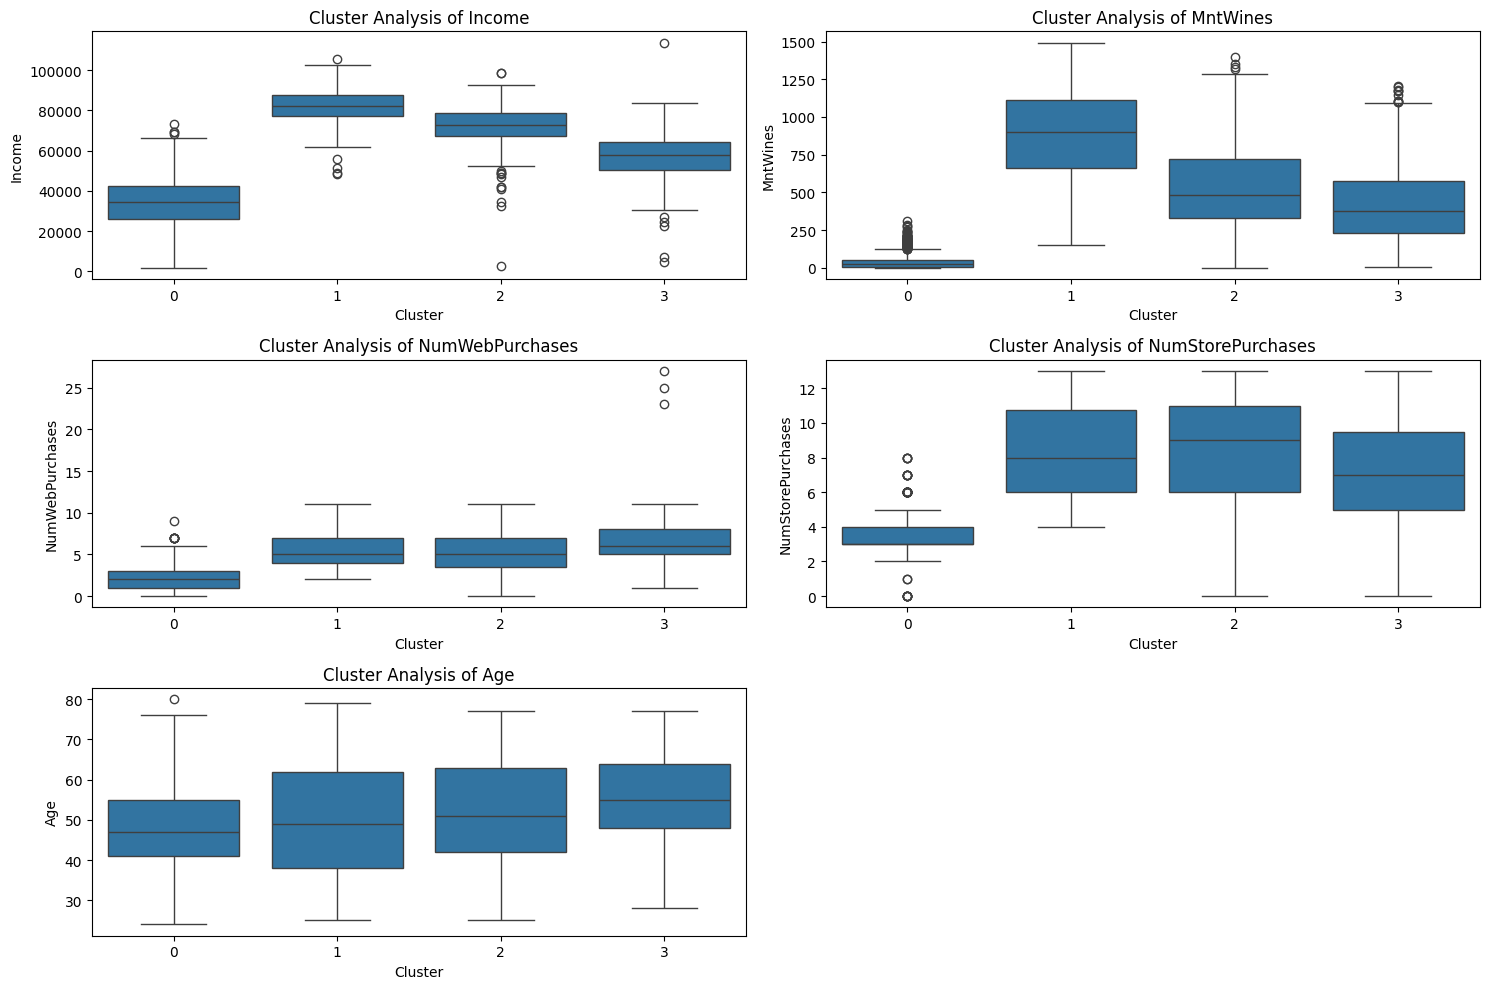

In [18]:
selected_features = ['Income', 'MntWines', 'NumWebPurchases', 'NumStorePurchases', 'Age']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Cluster', y=feature, data=ifood)
    plt.title(f'Cluster Analysis of {feature}')
plt.tight_layout()
plt.show()

Insights and Recommendations

In [19]:
cluster_summary = ifood.groupby('Cluster').mean()
print(cluster_summary)

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        34365.374143  0.794319  0.443683  49.135162   41.714006   5.056807   
1        81700.146067  0.050562  0.151685  49.393258  874.168539  55.432584   
2        72530.706150  0.045558  0.248292  50.111617  533.833713  71.687927   
3        57065.372134  0.238095  0.931217  47.807760  427.774250  20.666667   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              23.569050         7.173359          5.142997     15.571988   
1             464.247191        79.966292         65.280899     77.668539   
2             424.742597       104.596811         70.193622     77.220957   
3             125.839506        27.825397         21.396825     59.121693   

         ...  marital_Together  marital_Widow  education_2n Cy

Recommendations based on insights:                                               
For instance, if Cluster 0 has high income and high wine purchases, consider targeted wine promotions for this group.

In [20]:
# Example Insights:
for i in range(4):  # Assuming 4 clusters
    print(f"Cluster {i} Characteristics:")
    print(cluster_summary.loc[i])
    print()

Cluster 0 Characteristics:
Income                  34365.374143
Kidhome                     0.794319
Teenhome                    0.443683
Recency                    49.135162
MntWines                   41.714006
MntFruits                   5.056807
MntMeatProducts            23.569050
MntFishProducts             7.173359
MntSweetProducts            5.142997
MntGoldProds               15.571988
NumDealsPurchases           2.060725
NumWebPurchases             2.120470
NumCatalogPurchases         0.562194
NumStorePurchases           3.219393
NumWebVisitsMonth           6.476983
AcceptedCmp3                0.074437
AcceptedCmp4                0.006856
AcceptedCmp5                0.000000
AcceptedCmp1                0.000979
AcceptedCmp2                0.001959
Complain                    0.011753
Z_CostContact               3.000000
Z_Revenue                  11.000000
Response                    0.093046
Age                        48.160627
Customer_Days            2480.144956
marital_Div

Summary

The code performs a customer segmentation analysis for an ecommerce company. It begins by importing necessary libraries and reading a dataset containing customer information. The data exploration phase includes checking the dataset’s structure, data types, and missing values, which are filled with median values. Descriptive statistics such as average purchase value and purchase frequency are calculated. For customer segmentation, relevant features are selected and scaled using StandardScaler. The K-Means clustering algorithm is applied to segment customers into four clusters, and the silhouette score is computed to evaluate the clustering quality. Visualizations, including box plots, are created to illustrate the characteristics of each cluster based on selected features. Finally, the mean values of each feature for each cluster are calculated and printed, providing insights and recommendations for targeted marketing strategies based on the identified customer segments.*italicized text*